An example calculating and comparing zonal heating rates in the tropics from Cloudsat FLXHR-LIDAR files

In [1]:
import pathlib
from datetime import datetime

import numpy as np
import xarray as xr
from scipy.stats import binned_statistic_2d
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from cloudsatipy import open_cloudsat

In [2]:
data_path = pathlib.Path("../../data/cloudsat/2b_flxhr_lidar")

In [3]:
date = datetime(2010, 8, 1)

In [4]:
flxhr_files = sorted(list((data_path / date.strftime("%Y") / date.strftime("%j")).glob("*.hdf")))

In [5]:
flxhr_files

[PosixPath('../../data/cloudsat/2b_flxhr_lidar/2010/213/2010213011738_22655_CS_2B-FLXHR-LIDAR_GRANULE_P2_R05_E03_F00.hdf'),
 PosixPath('../../data/cloudsat/2b_flxhr_lidar/2010/213/2010213025631_22656_CS_2B-FLXHR-LIDAR_GRANULE_P2_R05_E03_F00.hdf'),
 PosixPath('../../data/cloudsat/2b_flxhr_lidar/2010/213/2010213043524_22657_CS_2B-FLXHR-LIDAR_GRANULE_P2_R05_E03_F00.hdf'),
 PosixPath('../../data/cloudsat/2b_flxhr_lidar/2010/213/2010213061417_22658_CS_2B-FLXHR-LIDAR_GRANULE_P2_R05_E03_F00.hdf'),
 PosixPath('../../data/cloudsat/2b_flxhr_lidar/2010/213/2010213075310_22659_CS_2B-FLXHR-LIDAR_GRANULE_P2_R05_E03_F00.hdf'),
 PosixPath('../../data/cloudsat/2b_flxhr_lidar/2010/213/2010213093203_22660_CS_2B-FLXHR-LIDAR_GRANULE_P2_R05_E03_F00.hdf'),
 PosixPath('../../data/cloudsat/2b_flxhr_lidar/2010/213/2010213111057_22661_CS_2B-FLXHR-LIDAR_GRANULE_P2_R05_E03_F00.hdf'),
 PosixPath('../../data/cloudsat/2b_flxhr_lidar/2010/213/2010213124950_22662_CS_2B-FLXHR-LIDAR_GRANULE_P2_R05_E03_F00.hdf'),
 PosixPa

In [6]:
open_cloudsat(flxhr_files[0])

<xarray.Dataset> Size: 359MB
Dimensions:                   (Nray: 37081, Nbin: 125, Nbands_Flxhr2B: 2,
                               Nz_Flux_Flxhr2B: 126, Nz_Hr_Flxhr2B: 125,
                               Nflags: 20, Nlatbins: 8)
Coordinates:
    Profile_time              (Nray) datetime64[ns] 297kB 2010-08-01T01:17:38...
    UTC_start                 float64 8B 4.659e+03
    TAI_start                 float64 8B 5.548e+08
    Latitude                  (Nray) float32 148kB -0.003431 ... 0.007986
    Longitude                 (Nray) float32 148kB 6.837 6.835 ... -17.88 -17.88
    Height                    (Nray, Nbin) float32 19MB 2.503e+04 ... -4.79e+03
    Range_to_intercept        (Nray) float32 148kB 705.7 705.7 ... 705.6 705.6
    DEM_elevation             (Nray) float32 148kB nan nan nan ... nan nan nan
    Vertical_binsize          float64 8B 239.8
    Pitch_offset              float64 8B 0.16
    Roll_offset               float64 8B 0.0
    SurfaceHeightBin          (Nray) float32 148kB 105.0 105.0 ... 105.0 105.0
Dimensions without coordinates: Nray, Nbin, Nbands_Flxhr2B, Nz_Flux_Flxhr2B,
                                Nz_Hr_Flxhr2B, Nflags, Nlatbins
Data variables: (12/46)
    Data_quality              (Nray) float32 148kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Data_status               (Nray) float32 148kB 4.148e+03 ... 4.148e+03
    Data_targetID             (Nray) float32 148kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    RayStatus_validity        (Nray) float32 148kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Navigation_land_sea_flag  (Nray) float32 148kB 2.0 2.0 2.0 ... 2.0 2.0 2.0
    FD                        (Nbands_Flxhr2B, Nray, Nz_Flux_Flxhr2B) float32 37MB ...
    ...                        ...
    MeanQSW                   (Nflags, Nlatbins) float32 640B 0.6 0.69 ... nan
    SigmaQSW                  (Nflags, Nlatbins) float32 640B 0.68 0.65 ... nan
    Solar_zenith_angle        (Nray) float32 148kB 150.0 150.0 ... 150.0 150.0
    Land_Char                 (Nray) float32 148kB 17.0 17.0 17.0 ... 17.0 17.0
    Albedo                    (Nray) float32 148kB 0.2476 0.2476 ... 0.2476
    FlagCounts                (Nflags) float64 160B 6.694e+03 7.494e+03 ... 0.0
Attributes:
    granule_number:     22655.0
    ID_SITE:            Cooperative Institute for Research in the Atmosphere
    ID_CENTER:          CloudSat Data Processing Center
    ID_CENTER_URL:      http://cloudsat.cira.colostate.edu
    ID_MACHINE:         CSATLAS3
    ID_CREATED:         Thu Jan 05 20:48:24 2023
    algorithm_name:     2B-FLXHR-LIDAR
    algorithm_version:  P2_R05.2
    product_version:    P2_R05
    start_time:         20100801011738
    end_time:           20100801025631

Load and concatenate QR field

In [7]:
cloudsat_qr = xr.concat((open_cloudsat(f, variable=["QR", "Solar_zenith_angle"]) for f in flxhr_files), "Nray")

In [8]:
cloudsat_qr

<xarray.Dataset> Size: 804MB
Dimensions:             (Nbands_Flxhr2B: 2, Nray: 519140, Nz_Hr_Flxhr2B: 125,
                         Nbin: 125)
Coordinates:
    Profile_time        (Nray) datetime64[ns] 4MB 2010-08-01T01:17:38.6679687...
    UTC_start           (Nray) float64 4MB 4.659e+03 4.659e+03 ... 8.179e+04
    TAI_start           (Nray) float64 4MB 5.548e+08 5.548e+08 ... 5.549e+08
    Latitude            (Nray) float32 2MB -0.003431 -0.0131 ... 0.009378
    Longitude           (Nray) float32 2MB 6.837 6.835 6.833 ... 20.75 20.74
    Height              (Nray, Nbin) float32 260MB 2.503e+04 ... -4.683e+03
    Range_to_intercept  (Nray) float32 2MB 705.7 705.7 705.7 ... 705.7 705.7
    DEM_elevation       (Nray) float32 2MB nan nan nan nan ... 379.0 374.0 370.0
    Vertical_binsize    float64 8B 239.8
    Pitch_offset        float64 8B 0.16
    Roll_offset         float64 8B 0.0
    SurfaceHeightBin    (Nray) float32 2MB 105.0 105.0 105.0 ... 104.0 104.0
Dimensions without coordinates: Nbands_Flxhr2B, Nray, Nz_Hr_Flxhr2B, Nbin
Data variables:
    QR                  (Nbands_Flxhr2B, Nray, Nz_Hr_Flxhr2B) float32 519MB n...
    Solar_zenith_angle  (Nray) float32 2MB 150.0 150.0 150.0 ... 150.1 150.1
Attributes:
    granule_number:     22655.0
    ID_SITE:            Cooperative Institute for Research in the Atmosphere
    ID_CENTER:          CloudSat Data Processing Center
    ID_CENTER_URL:      http://cloudsat.cira.colostate.edu
    ID_MACHINE:         CSATLAS3
    ID_CREATED:         Thu Jan 05 20:48:24 2023
    algorithm_name:     2B-FLXHR-LIDAR
    algorithm_version:  P2_R05.2
    product_version:    P2_R05
    start_time:         20100801011738
    end_time:           20100801025631

Plot cloudsat orbit tracks over the tropics

Text(0.5, 1.0, 'Cloudsat orbit tracks 2010-08-01')

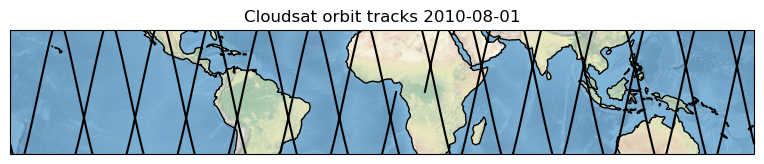

In [9]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection":ccrs.PlateCarree()}, figsize=(9.6,2.4))
ax.stock_img()
ax.coastlines()
ax.plot(cloudsat_qr.Longitude, cloudsat_qr.Latitude, "k-", transform=ccrs.Geodetic())
ax.set_extent([-180, 180, -30, 30], ccrs.PlateCarree())
ax.set_title(f'Cloudsat orbit tracks {date.strftime("%Y-%m-%d")}')

Bin QR by latitude and height

In [10]:
lat_bins = np.arange(-30, 31, 1)
height_bins = np.arange(0,2.5e4+1,500)

In [11]:
# Tile lats to same shape as height and QR
lats = np.tile(cloudsat_qr.Latitude.values.reshape([-1,1]), (1, cloudsat_qr.Nbin.size))
heights = cloudsat_qr.Height.values
# Sum SW and LW to get total heating rate
qr = cloudsat_qr.QR.sum("Nbands_Flxhr2B").values
# Separate day and night
is_daytime = cloudsat_qr.Solar_zenith_angle < 90

In [12]:
# Bin data by latitude and height and calculate mean
zonal_mean_qr_day = binned_statistic_2d(
    heights[is_daytime].ravel(),
    lats[is_daytime].ravel(),
    qr[is_daytime].ravel(),
    statistic=np.nanmean,
    bins=[height_bins, lat_bins]
)

zonal_mean_qr_night = binned_statistic_2d(
    heights[~is_daytime].ravel(),
    lats[~is_daytime].ravel(),
    qr[~is_daytime].ravel(),
    statistic=np.nanmean,
    bins=[height_bins, lat_bins]
)

In [13]:
zonal_mean_qr_day

BinnedStatistic2dResult(statistic=array([[ 0.44722828,  0.37490514,  0.30479881, ...,  1.27314019,
         1.35108292,  1.11487389],
       [ 0.28984815,  0.39200264,  0.37247857, ...,  1.3212254 ,
         1.29768693,  1.30315423],
       [-0.73451084, -1.30441821, -1.22307837, ...,  0.66433543,
        -0.06823767, -0.17642453],
       ...,
       [ 1.05801511,  1.09863436,  1.10661602, ...,  1.14715457,
         1.10090363,  1.11568618],
       [ 1.09078288,  1.12727785,  1.14745283, ...,  1.28757644,
         1.25395298,  1.26828671],
       [ 0.73529667,  0.7650376 ,  0.80676413, ...,  0.90866208,
         0.922611  ,  0.90656561]]), x_edge=array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
        4000.,  4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,
        8000.,  8500.,  9000.,  9500., 10000., 10500., 11000., 11500.,
       12000., 12500., 13000., 13500., 14000., 14500., 15000., 15500.,
       16000., 16500., 17000., 17500., 18000., 18500., 19000.

In [14]:
img_extent = [lat_bins[0], lat_bins[-1], height_bins[0], height_bins[-1]]

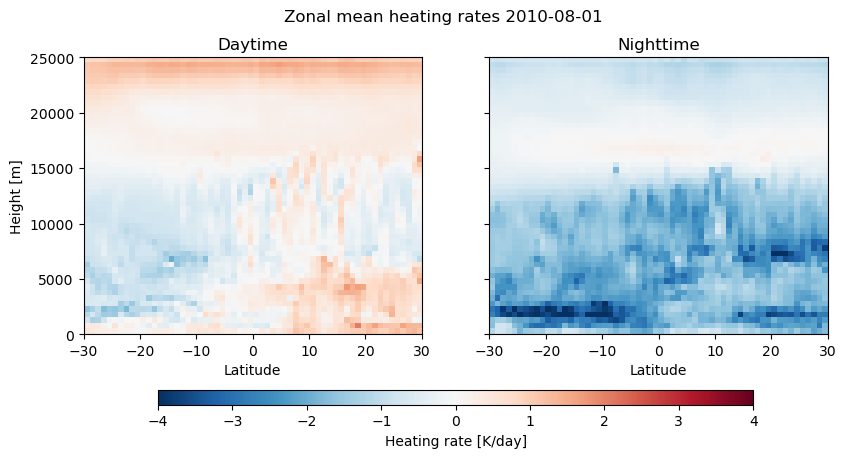

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9.6, 4.8))

im1 = ax1.imshow(zonal_mean_qr_day.statistic, origin="lower", extent=img_extent, aspect="auto", cmap="RdBu_r", vmin=-4, vmax=4)
ax1.set_title("Daytime")
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Height [m]")

im2 = ax2.imshow(zonal_mean_qr_night.statistic, origin="lower", extent=img_extent, aspect="auto", cmap="RdBu_r", vmin=-4, vmax=4)
ax2.set_title("Nighttime")
ax2.set_xlabel("Latitude")

plt.subplots_adjust(wspace=0.2)
plt.suptitle(f'Zonal mean heating rates {date.strftime("%Y-%m-%d")}')
fig.colorbar(im1, ax=[ax1, ax2], orientation="horizontal", shrink=0.8, fraction=0.1, aspect=40, label="Heating rate [K/day]")


In [16]:
# Repeat for a different time of year
date = datetime(2010, 2, 1)
flxhr_files = sorted(list((data_path / date.strftime("%Y") / date.strftime("%j")).glob("*.hdf")))
cloudsat_qr_feb = xr.concat((open_cloudsat(f, variable=["QR", "Solar_zenith_angle"]) for f in flxhr_files), "Nray")

lats = np.tile(cloudsat_qr_feb.Latitude.values.reshape([-1,1]), (1, cloudsat_qr.Nbin.size))
heights = cloudsat_qr_feb.Height.values
qr = cloudsat_qr_feb.QR.sum("Nbands_Flxhr2B").values
is_daytime = cloudsat_qr_feb.Solar_zenith_angle < 90

zonal_mean_qr_feb_day = binned_statistic_2d(
    heights[is_daytime].ravel(),
    lats[is_daytime].ravel(),
    qr[is_daytime].ravel(),
    statistic=np.nanmean,
    bins=[height_bins, lat_bins]
)

zonal_mean_qr_feb_night = binned_statistic_2d(
    heights[~is_daytime].ravel(),
    lats[~is_daytime].ravel(),
    qr[~is_daytime].ravel(),
    statistic=np.nanmean,
    bins=[height_bins, lat_bins]
)

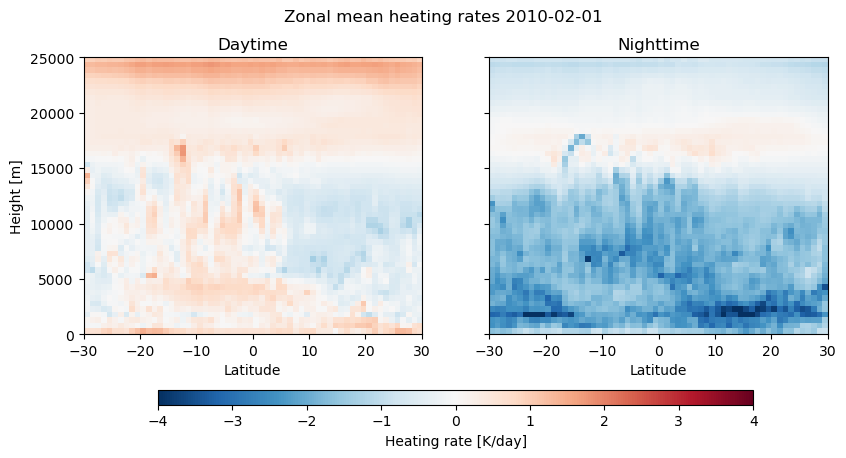

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9.6, 4.8))

im1 = ax1.imshow(zonal_mean_qr_feb_day.statistic, origin="lower", extent=img_extent, aspect="auto", cmap="RdBu_r", vmin=-4, vmax=4)
ax1.set_title("Daytime")
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Height [m]")

im2 = ax2.imshow(zonal_mean_qr_feb_night.statistic, origin="lower", extent=img_extent, aspect="auto", cmap="RdBu_r", vmin=-4, vmax=4)
ax2.set_title("Nighttime")
ax2.set_xlabel("Latitude")

plt.subplots_adjust(wspace=0.2)
plt.suptitle(f'Zonal mean heating rates {date.strftime("%Y-%m-%d")}')
fig.colorbar(im1, ax=[ax1, ax2], orientation="horizontal", shrink=0.8, fraction=0.1, aspect=40, label="Heating rate [K/day]")


Plot differences

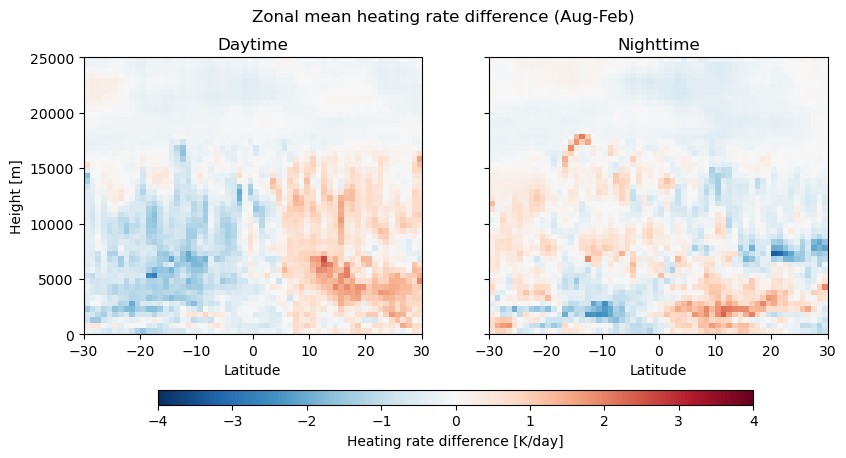

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9.6, 4.8))

im1 = ax1.imshow(
    zonal_mean_qr_day.statistic - zonal_mean_qr_feb_day.statistic, 
    origin="lower", extent=img_extent, aspect="auto", cmap="RdBu_r", vmin=-4, vmax=4
)
ax1.set_title("Daytime")
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Height [m]")

im2 = ax2.imshow(
    zonal_mean_qr_night.statistic - zonal_mean_qr_feb_night.statistic, 
    origin="lower", extent=img_extent, aspect="auto", cmap="RdBu_r", vmin=-4, vmax=4
)
ax2.set_title("Nighttime")
ax2.set_xlabel("Latitude")

plt.subplots_adjust(wspace=0.2)
plt.suptitle(f'Zonal mean heating rate difference (Aug-Feb)')
fig.colorbar(im1, ax=[ax1, ax2], orientation="horizontal", shrink=0.8, fraction=0.1, aspect=40, label="Heating rate difference [K/day]")
